# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

## Instructions

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `geo` parameter to True.
    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `frame_width` parameter to 700.
    * Set the `frame_height` parameter to 500.
    * Include a descriptive title.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [17]:
# Importing the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

## Import the data 

In [18]:
#Creating a DataFrame by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path('./Resources/sfo_neighborhoods_census_data.csv'))

display(sfo_data_df.head())
display(sfo_data_df.tail())

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


---

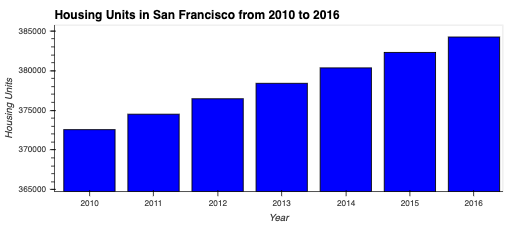## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [19]:
# Creating a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby('year').mean()

housing_units_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [20]:
# Creating a visual aggregation displaying the housing units by year
housing_units_by_year.hvplot.bar(
    x = 'year',
    y = 'housing_units',
    rot = 90,
    title = 'Housing Units in San Francisco from 2010-2016',
    color = 'green'
).opts(yformatter = '%10f')

:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analyzed?

**Answer:** There has been a consistent increase in the overall trend for housing_units over the period being analyzed.

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [21]:
#Grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby('year').mean()

prices_square_foot_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** # YOUR ANSWER HERE

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [22]:
#Creating a new DataFrame with only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = prices_square_foot_by_year.drop(['housing_units'], axis = 1)

prices_square_foot_by_year

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [23]:
# Plotting the prices_square_foot_by_year dataframe

prices_square_foot_by_year.hvplot(
    xlabel = 'Year',
    ylabel = 'Gross Rent/ Average sale price per Square foot',
    title = "Average sale price per Sq foot vs Gross Rent for years 2010-2016 in San Francisco",
    size = (20,10))

:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

 # There was a drop in the average sale price per square foot from 2010 to 2011.


# Even though there was a drop in the average sale price per square foot from 2010 to 2011, gross rent still raised by $211.

---

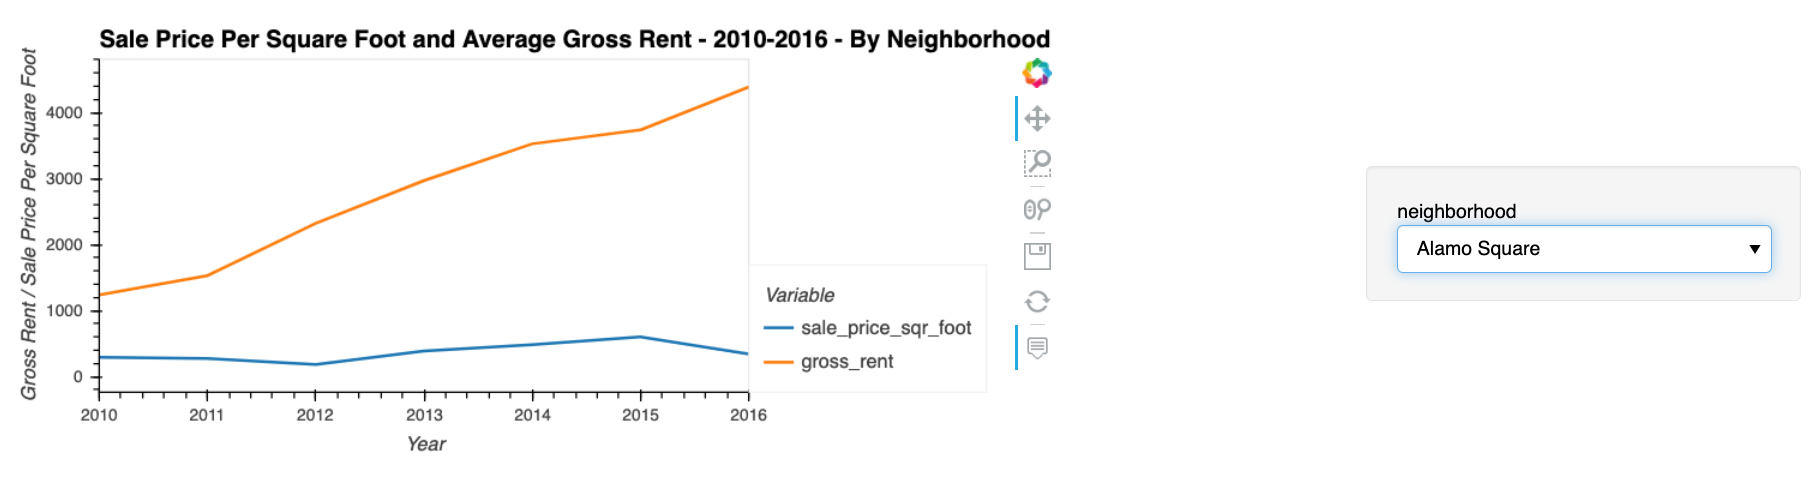## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [24]:
# Creating a new dataframe by grouping bb year and neighborhood 
prices_by_year_by_neighborhood = sfo_data_df.groupby(['year','neighborhood']).mean()

prices_by_year_by_neighborhood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [25]:
# Updating the prices by year by neighborhood Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop('housing_units',axis = 1)


display(prices_by_year_by_neighborhood.head())
display(prices_by_year_by_neighborhood.tail())

sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945        1239
     Anza Vista                 267.932583        1239
     Bayview                    170.098665        1239
     Buena Vista Park           347.394919        1239
     Central Richmond           319.027623        1239

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771        4390
     Twin Peaks                       970.085470        4390
     Van Ness/ Civic Center           552.602567        4390
     Visitacion Valley                328.319007        4390
     Westwood Park                    631.195426        4390

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [26]:
# Using hvplot to create an interactive line plot of the average price per square foot

prices_by_year_by_neighborhood.hvplot(
    groupby = 'neighborhood',
    x="year",
    xlabel = 'Year',
    ylabel = 'Gross Rent/ Sale price per Square foot',
    title = "Sale Price per Square Foot and Average Gross Rent - By Neighborhood 2010-2016")

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question:** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** The average price per square foot for 2016 is $256 less than the price it was in 2016.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [28]:
# Loading neighborhood coordinates data from the csv file
neighborhood_locations_df = pd.read_csv(
    Path("./Resources/neighborhoods_coordinates.csv"),
    index_col = "Neighborhood")


neighborhood_locations_df

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [30]:
# Calculating the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby('neighborhood').mean()

all_neighborhood_info_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [31]:
# Using the Pandas `concat` function to join the neighborhood_locations_df and the all_neighborhood_info_df DataFrame
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [48]:
# Calling the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Renaming the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Reviewing the resulting DataFrame
display(all_neighborhoods_df.head(5))
display(all_neighborhoods_df.tail(5))

,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,0,0,0,0,0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,1,1,1,1,1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,2,2,2,2,2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,3,3,3,3,3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
4,4,4,4,4,5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333


,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
64,64,64,64,64,68,West Portal,37.74026,-122.463880,2012.25,498.488485,376940.75,2515.500000
65,65,65,65,65,69,Western Addition,37.79298,-122.435790,2012.50,307.562201,377427.50,2555.166667
66,66,66,66,66,70,Westwood Highlands,37.73470,-122.456854,2012.00,533.703935,376454.00,2250.500000
67,67,67,67,67,71,Westwood Park,37.73415,-122.457000,2015.00,687.087575,382295.00,3959.000000
68,68,68,68,68,72,Yerba Buena,37.79298,-122.396360,2012.50,576.709848,377427.50,2555.166667


### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

In [43]:
# Creating a Geoviews plot to analyze neighborhood info
all_neighborhoods_df.hvplot.points(
    'Lon',
    'Lat',
    geo = True,
    size = 'sale_price_sqr_foot',
    color = 'gross_rent',
    tiles = 'OSM',
    frame_width = 700,
    frame_height = 500,
    title = "San Francisco Gross Rent and Sale Price per Square Foot by Neighborhoods Map")

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot)

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** # Westwood Park has the highest gross rent and Union Square district has the highest sale price per square foot.

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer:** # Rental income growth has nearly quadrupled in the last 6 years while the trend in sales prices have moved much slower, not even doubling over the period. It does not hold true for all neighborhoods such as Alamo square and Anza vista who have gone down in sale price value for the last 6 years. 

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer:** Based on the data above there is some excellent oppurtunities in the san francisco real estate market. We have options whethere we are looking in neighborhoods that produce high gross rent that is consistently getting higher with lower average sales prices or looking to purchase in neighborhoods where there is a general uptrend in both average sales price and gross rent in hopes of property appreciation. I would recommend central richmond as a safe investment since property values are consistently rising while the gross rent is sky rocketing. Also if you are looking for a high risk high reward option Anza Vista could be very profitable since it is at a low price in 2016 with consisitent uptrend in rent.